In [1]:
"""
WARNING: Cell 10 (Which is the plot for the decision boundary) does not run to completion because the perceptron isn't able 
to completely classify my code binarily (is that a word?). At least, I assume this is the case, because when I ran the below 
code my entire computer bluescreened and I had to shut it off, most likely because of the numerous errors shown above or some 
sort of infinite looping. This is because the data I have chosen has some slight variance that results in the perceptron being 
unable to completely linearly separate the two binary values; in addition, after tinkering with the values, 50 iterations 
seems like it has the least amount of errors which is shown as 36 errors; 45 iterations will yield 45 errors; 55 iterations 
will yield 41 errors. 100 and 200 seem to yield a higher amount of errors or the same amount as 50.
"""

"\nWARNING: Cell 10 (Which is the plot for the decision boundary) does not run to completion because the perceptron isn't able \nto completely classify my code binarily (is that a word?). At least, I assume this is the case, because when I ran the below \ncode my entire computer bluescreened and I had to shut it off, most likely because of the numerous errors shown above or some \nsort of infinite looping. This is because the data I have chosen has some slight variance that results in the perceptron being \nunable to completely linearly separate the two binary values; in addition, after tinkering with the values, 50 iterations \nseems like it has the least amount of errors which is shown as 36 errors; 45 iterations will yield 45 errors; 55 iterations \nwill yield 41 errors. 100 and 200 seem to yield a higher amount of errors or the same amount as 50.\n"

In [2]:
import numpy as np
import csv

In [3]:
# Attempts to convert a value into an int. If it is not able to, return the original element.

def try_int(s):
    try:
        f = int(s)
    except ValueError:
        return s
    return f

In [4]:
#Sift through which indexes of binary classification are zeros or ones. Returns two list of indexes.

def sift_binary(s):
    zeros = []
    ones = []
    index = 0
    t = s.tolist()
    for value in t:
        if value == 0:
            zeros.append(index)
        else:
            ones.append(index)
        index += 1
    return (zeros, ones)

In [5]:
# Changes to books code below marked #LS

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        #self.b_ = 0. # same! #LS
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi)) #LS
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors) #LS
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [6]:
import os
import pandas as pd

try:
    s = 'Computers.csv'
    # 0 is computer number; 1 is price; 2 is speed; 3 is hd space; 4 is ram; 5 is screen size; 6 is cd; 
    # 7 is multi; 8 is premium; 9 is ads; 10 is trend
    # The idea is to compare computers that cost 2000 or less to computers that cost more than 2000 (0 and 1 values) using 
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
#   print (df[0:50])
    
except HTTPError:
    s = 'iris.data'
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: Computers.csv


,0,1,2,3,4,5,6,7,8,9,10
6255,6255.0,1690,100,528,8,15,no,no,yes,39,35
6256,6256.0,2223,66,850,16,15,yes,yes,yes,39,35
6257,6257.0,2654,100,1200,24,15,yes,no,yes,39,35
6258,6258.0,2195,100,850,16,15,yes,no,yes,39,35
6259,6259.0,2490,100,850,16,17,yes,no,yes,39,35


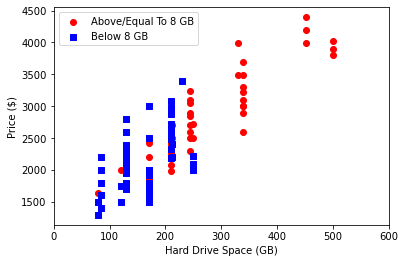

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Extract the first 100 values, disregarding the first value, which is the header

y = df.iloc[1:101, 4].values

# Set up binary classification, less than 8 GB and greater than / equal to 8 GB
y = np.where((y == '8') | (y == '16'), 0, 1)

#print(y)

"""
** Old version attempting to make it easier to classify RAM by turning str values into float values
z = []
for value in y:
    z.append(value)
z = [try_float(value) for value in z]
print (z)

for value in z:
    value = np.where(value <= 8, 0, 1)
print (z)
"""

# The problem here is that I cannot use above/below 8 GB as is; I need to separate the current 0 and 1 values so that
# I can use them for the scatter plot accurately
#zero_values = [x for x in range(len(y)) if y[x] == 0]
#one_values = [x for x in range(len(y)) if y[x] == 1]

# Find which indexes contain zeros, and which ones contain ones; This will be used for accurate plotting
zeros, ones = sift_binary(y)

# Extract hard drive space and price of computer
X = df.iloc[1:101, [3, 1]].values

# Turn the values in X from str to int for the perceptron to use
X = X.astype(int)

# Turn hard drive values into floats; these will be used for scatter plot's x-axis
hard_drive_values = [x[0] for x in X]
hard_drive_values = [try_int(x) for x in hard_drive_values]

# Create lists that combine the indices from sift_binary(y) and the values from hard_drive_values
hdv_zeros = []
hdv_ones = []
for value in zeros:
    hdv_zeros.append(hard_drive_values[value])
for value in ones:
    hdv_ones.append(hard_drive_values[value])

# Create lists that combine the indices from sift_binary(y) and the values from price
price = [x[1] for x in X] 
price = [try_int(x) for x in price]
price_zeros = []
price_ones = []
for value in zeros:
    price_zeros.append(price[value])
for value in ones:
    price_ones.append(price[value])



# plot data

plt.scatter(hdv_zeros, price_zeros,
            color='red', marker='o', label='Above/Equal To 8 GB')
plt.scatter(hdv_ones, price_ones,
            color='blue', marker='s', label='Below 8 GB')


# Set xtick labels to appropriate values
plt.xticks(ticks = [0, 100, 200, 300, 400, 500, 600], labels = [0, 100, 200, 300, 400, 500, 600])

plt.xlabel('Hard Drive Space (GB)')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

xi:  [  80 1499] Target:  1 Prediction:  0
xi:  [  85 1795] Target:  1 Prediction:  1
xi:  [ 170 1595] Target:  1 Prediction:  1
xi:  [ 170 1849] Target:  0 Prediction:  1
xi:  [ 340 3295] Target:  0 Prediction:  0
xi:  [ 340 3695] Target:  0 Prediction:  0
xi:  [ 170 1720] Target:  1 Prediction:  0
xi:  [  85 1995] Target:  1 Prediction:  1
xi:  [ 210 2225] Target:  0 Prediction:  1
xi:  [ 210 2575] Target:  1 Prediction:  0
xi:  [ 170 2195] Target:  0 Prediction:  1
xi:  [ 210 2605] Target:  0 Prediction:  0
xi:  [ 130 2045] Target:  1 Prediction:  0
xi:  [ 245 2295] Target:  0 Prediction:  1
xi:  [ 212 2699] Target:  0 Prediction:  0
xi:  [ 130 2225] Target:  1 Prediction:  0
xi:  [  85 1595] Target:  1 Prediction:  1
xi:  [ 210 2325] Target:  1 Prediction:  1
xi:  [ 250 2095] Target:  1 Prediction:  1
xi:  [ 452 4395] Target:  0 Prediction:  1
xi:  [ 130 1695] Target:  1 Prediction:  0
xi:  [ 130 2795] Target:  1 Prediction:  0
xi:  [ 340 2895] Target:  0 Prediction:  1
xi:  [ 210 

xi:  [ 210 1975] Target:  0 Prediction:  0
xi:  [ 340 3220] Target:  0 Prediction:  0
xi:  [ 130 2595] Target:  1 Prediction:  0
xi:  [  80 1629] Target:  0 Prediction:  1
xi:  [ 230 3399] Target:  1 Prediction:  0
xi:  [ 245 2495] Target:  0 Prediction:  1
xi:  [ 210 2990] Target:  0 Prediction:  1
xi:  [ 250 2720] Target:  0 Prediction:  0
xi:  [ 245 2595] Target:  0 Prediction:  0
xi:  [ 120 1999] Target:  0 Prediction:  0
xi:  [ 210 2075] Target:  0 Prediction:  0
xi:  [ 130 1795] Target:  1 Prediction:  0
xi:  [  85 1395] Target:  1 Prediction:  0
xi:  [ 330 3490] Target:  0 Prediction:  1
xi:  [ 210 2975] Target:  1 Prediction:  0
xi:  [ 130 2145] Target:  1 Prediction:  0
xi:  [ 170 2420] Target:  0 Prediction:  1
xi:  [ 210 2505] Target:  0 Prediction:  0
xi:  [ 340 2995] Target:  0 Prediction:  0
xi:  [ 170 1495] Target:  1 Prediction:  0
xi:  [ 170 1999] Target:  1 Prediction:  1
xi:  [ 170 1920] Target:  1 Prediction:  1
xi:  [ 340 2595] Target:  0 Prediction:  1
xi:  [ 170 

xi:  [ 170 1849] Target:  0 Prediction:  1
xi:  [ 340 3295] Target:  0 Prediction:  0
xi:  [ 340 3695] Target:  0 Prediction:  0
xi:  [ 170 1720] Target:  1 Prediction:  0
xi:  [  85 1995] Target:  1 Prediction:  1
xi:  [ 210 2225] Target:  0 Prediction:  1
xi:  [ 210 2575] Target:  1 Prediction:  0
xi:  [ 170 2195] Target:  0 Prediction:  1
xi:  [ 210 2605] Target:  0 Prediction:  0
xi:  [ 130 2045] Target:  1 Prediction:  0
xi:  [ 245 2295] Target:  0 Prediction:  1
xi:  [ 212 2699] Target:  0 Prediction:  0
xi:  [ 130 2225] Target:  1 Prediction:  0
xi:  [  85 1595] Target:  1 Prediction:  1
xi:  [ 210 2325] Target:  1 Prediction:  1
xi:  [ 250 2095] Target:  1 Prediction:  1
xi:  [ 452 4395] Target:  0 Prediction:  1
xi:  [ 130 1695] Target:  1 Prediction:  0
xi:  [ 130 2795] Target:  1 Prediction:  0
xi:  [ 340 2895] Target:  0 Prediction:  1
xi:  [ 210 2875] Target:  1 Prediction:  0
xi:  [ 452 4195] Target:  0 Prediction:  1
xi:  [  80 1290] Target:  1 Prediction:  0
xi:  [ 130 

xi:  [ 170 1795] Target:  1 Prediction:  0
xi:  [ 250 2495] Target:  0 Prediction:  1
xi:  [ 250 2220] Target:  1 Prediction:  0
xi:  [  85 2195] Target:  1 Prediction:  1
xi:  [ 170 1495] Target:  1 Prediction:  1
xi:  [ 130 2325] Target:  1 Prediction:  1
xi:  [ 120 1499] Target:  1 Prediction:  1
xi:  [ 212 2199] Target:  1 Prediction:  1
xi:  [ 245 3095] Target:  0 Prediction:  1
xi:  [ 500 4020] Target:  0 Prediction:  0
xi:  [ 210 2725] Target:  1 Prediction:  0
xi:  [ 170 1695] Target:  1 Prediction:  1
xi:  [ 245 3044] Target:  0 Prediction:  1
xi:  [ 170 2999] Target:  1 Prediction:  0
xi:  [ 245 2844] Target:  0 Prediction:  1
xi:  [ 210 1975] Target:  0 Prediction:  0
xi:  [ 340 3220] Target:  0 Prediction:  0
xi:  [ 130 2595] Target:  1 Prediction:  0
xi:  [  80 1629] Target:  0 Prediction:  1
xi:  [ 230 3399] Target:  1 Prediction:  0
xi:  [ 245 2495] Target:  0 Prediction:  1
xi:  [ 210 2990] Target:  0 Prediction:  0
xi:  [ 250 2720] Target:  0 Prediction:  0
xi:  [ 245 

xi:  [ 210 2425] Target:  0 Prediction:  0
xi:  [ 245 2895] Target:  0 Prediction:  0
xi:  [ 500 3895] Target:  0 Prediction:  0
xi:  [ 212 2499] Target:  0 Prediction:  0
xi:  [ 210 2255] Target:  0 Prediction:  0
xi:  [ 340 3495] Target:  0 Prediction:  0
xi:  [ 245 2695] Target:  0 Prediction:  0
xi:  [ 130 2195] Target:  1 Prediction:  0
xi:  [ 120 1749] Target:  1 Prediction:  1
xi:  [ 212 2399] Target:  1 Prediction:  1
xi:  [ 250 1995] Target:  1 Prediction:  1
xi:  [ 170 2499] Target:  1 Prediction:  1
xi:  [ 130 2395] Target:  1 Prediction:  1
xi:  [ 340 2995] Target:  0 Prediction:  1
xi:  [ 210 2190] Target:  1 Prediction:  0
xi:  [ 212 2199] Target:  0 Prediction:  0
xi:  [ 130 2125] Target:  1 Prediction:  0
xi:  [ 130 2045] Target:  1 Prediction:  1
xi:  [ 210 3075] Target:  1 Prediction:  1
xi:  [ 210 2945] Target:  0 Prediction:  1
xi:  [ 130 1945] Target:  1 Prediction:  0
xi:  [ 330 3990] Target:  0 Prediction:  1
xi:  [ 170 1795] Target:  1 Prediction:  0
xi:  [ 250 

xi:  [ 212 2499] Target:  0 Prediction:  0
xi:  [ 210 2255] Target:  0 Prediction:  0
xi:  [ 340 3495] Target:  0 Prediction:  0
xi:  [ 245 2695] Target:  0 Prediction:  0
xi:  [ 130 2195] Target:  1 Prediction:  0
xi:  [ 120 1749] Target:  1 Prediction:  1
xi:  [ 212 2399] Target:  1 Prediction:  1
xi:  [ 250 1995] Target:  1 Prediction:  1
xi:  [ 170 2499] Target:  1 Prediction:  1
xi:  [ 130 2395] Target:  1 Prediction:  1
xi:  [ 340 2995] Target:  0 Prediction:  1
xi:  [ 210 2190] Target:  1 Prediction:  0
xi:  [ 212 2199] Target:  0 Prediction:  0
xi:  [ 130 2125] Target:  1 Prediction:  1
xi:  [ 130 2045] Target:  1 Prediction:  1
xi:  [ 210 3075] Target:  1 Prediction:  1
xi:  [ 210 2945] Target:  0 Prediction:  1
xi:  [ 130 1945] Target:  1 Prediction:  0
xi:  [ 330 3990] Target:  0 Prediction:  0
xi:  [ 170 1795] Target:  1 Prediction:  0
xi:  [ 250 2495] Target:  0 Prediction:  1
xi:  [ 250 2220] Target:  1 Prediction:  0
xi:  [  85 2195] Target:  1 Prediction:  1
xi:  [ 170 

xi:  [ 500 3795] Target:  0 Prediction:  0
xi:  [ 210 2405] Target:  0 Prediction:  0
xi:  [ 210 2425] Target:  0 Prediction:  0
xi:  [ 245 2895] Target:  0 Prediction:  0
xi:  [ 500 3895] Target:  0 Prediction:  0
xi:  [ 212 2499] Target:  0 Prediction:  0
xi:  [ 210 2255] Target:  0 Prediction:  0
xi:  [ 340 3495] Target:  0 Prediction:  0
xi:  [ 245 2695] Target:  0 Prediction:  0
xi:  [ 130 2195] Target:  1 Prediction:  0
xi:  [ 120 1749] Target:  1 Prediction:  1
xi:  [ 212 2399] Target:  1 Prediction:  1
xi:  [ 250 1995] Target:  1 Prediction:  1
xi:  [ 170 2499] Target:  1 Prediction:  1
xi:  [ 130 2395] Target:  1 Prediction:  1
xi:  [ 340 2995] Target:  0 Prediction:  1
xi:  [ 210 2190] Target:  1 Prediction:  0
xi:  [ 212 2199] Target:  0 Prediction:  1
xi:  [ 130 2125] Target:  1 Prediction:  0
xi:  [ 130 2045] Target:  1 Prediction:  1
xi:  [ 210 3075] Target:  1 Prediction:  1
xi:  [ 210 2945] Target:  0 Prediction:  1
xi:  [ 130 1945] Target:  1 Prediction:  0
xi:  [ 330 

xi:  [ 452 4395] Target:  0 Prediction:  1
xi:  [ 130 1695] Target:  1 Prediction:  0
xi:  [ 130 2795] Target:  1 Prediction:  1
xi:  [ 340 2895] Target:  0 Prediction:  0
xi:  [ 210 2875] Target:  1 Prediction:  1
xi:  [ 452 4195] Target:  0 Prediction:  0
xi:  [  80 1290] Target:  1 Prediction:  1
xi:  [ 130 1975] Target:  1 Prediction:  1
xi:  [ 452 3995] Target:  0 Prediction:  0
xi:  [ 340 3095] Target:  0 Prediction:  0
xi:  [ 245 3244] Target:  0 Prediction:  0
xi:  [ 170 1920] Target:  1 Prediction:  0
xi:  [ 130 1995] Target:  1 Prediction:  1
xi:  [ 210 2595] Target:  0 Prediction:  1
xi:  [ 210 2475] Target:  1 Prediction:  0
xi:  [ 170 1999] Target:  1 Prediction:  1
xi:  [ 210 2675] Target:  1 Prediction:  1
xi:  [ 210 2325] Target:  0 Prediction:  1
xi:  [ 500 3795] Target:  0 Prediction:  0
xi:  [ 210 2405] Target:  0 Prediction:  0
xi:  [ 210 2425] Target:  0 Prediction:  0
xi:  [ 245 2895] Target:  0 Prediction:  0
xi:  [ 500 3895] Target:  0 Prediction:  0
xi:  [ 212 

xi:  [ 210 2505] Target:  0 Prediction:  0
xi:  [ 340 2995] Target:  0 Prediction:  0
xi:  [ 170 1495] Target:  1 Prediction:  0
xi:  [ 170 1999] Target:  1 Prediction:  0
xi:  [ 170 1920] Target:  1 Prediction:  1
xi:  [ 340 2595] Target:  0 Prediction:  1
xi:  [ 170 1695] Target:  1 Prediction:  0
Errors:  48
xi:  [  80 1499] Target:  1 Prediction:  1
xi:  [  85 1795] Target:  1 Prediction:  1
xi:  [ 170 1595] Target:  1 Prediction:  0
xi:  [ 170 1849] Target:  0 Prediction:  1
xi:  [ 340 3295] Target:  0 Prediction:  0
xi:  [ 340 3695] Target:  0 Prediction:  1
xi:  [ 170 1720] Target:  1 Prediction:  0
xi:  [  85 1995] Target:  1 Prediction:  0
xi:  [ 210 2225] Target:  0 Prediction:  0
xi:  [ 210 2575] Target:  1 Prediction:  1
xi:  [ 170 2195] Target:  0 Prediction:  1
xi:  [ 210 2605] Target:  0 Prediction:  0
xi:  [ 130 2045] Target:  1 Prediction:  0
xi:  [ 245 2295] Target:  0 Prediction:  0
xi:  [ 212 2699] Target:  0 Prediction:  1
xi:  [ 130 2225] Target:  1 Prediction:  0

xi:  [ 212 2499] Target:  0 Prediction:  0
xi:  [ 210 2255] Target:  0 Prediction:  0
xi:  [ 340 3495] Target:  0 Prediction:  0
xi:  [ 245 2695] Target:  0 Prediction:  0
xi:  [ 130 2195] Target:  1 Prediction:  0
xi:  [ 120 1749] Target:  1 Prediction:  1
xi:  [ 212 2399] Target:  1 Prediction:  1
xi:  [ 250 1995] Target:  1 Prediction:  1
xi:  [ 170 2499] Target:  1 Prediction:  1
xi:  [ 130 2395] Target:  1 Prediction:  1
xi:  [ 340 2995] Target:  0 Prediction:  1
xi:  [ 210 2190] Target:  1 Prediction:  0
xi:  [ 212 2199] Target:  0 Prediction:  0
xi:  [ 130 2125] Target:  1 Prediction:  1
xi:  [ 130 2045] Target:  1 Prediction:  1
xi:  [ 210 3075] Target:  1 Prediction:  1
xi:  [ 210 2945] Target:  0 Prediction:  1
xi:  [ 130 1945] Target:  1 Prediction:  0
xi:  [ 330 3990] Target:  0 Prediction:  0
xi:  [ 170 1795] Target:  1 Prediction:  0
xi:  [ 250 2495] Target:  0 Prediction:  1
xi:  [ 250 2220] Target:  1 Prediction:  0
xi:  [  85 2195] Target:  1 Prediction:  1
xi:  [ 170 

xi:  [ 130 2045] Target:  1 Prediction:  0
xi:  [ 210 3075] Target:  1 Prediction:  1
xi:  [ 210 2945] Target:  0 Prediction:  1
xi:  [ 130 1945] Target:  1 Prediction:  0
xi:  [ 330 3990] Target:  0 Prediction:  1
xi:  [ 170 1795] Target:  1 Prediction:  0
xi:  [ 250 2495] Target:  0 Prediction:  0
xi:  [ 250 2220] Target:  1 Prediction:  0
xi:  [  85 2195] Target:  1 Prediction:  1
xi:  [ 170 1495] Target:  1 Prediction:  0
xi:  [ 130 2325] Target:  1 Prediction:  1
xi:  [ 120 1499] Target:  1 Prediction:  1
xi:  [ 212 2199] Target:  1 Prediction:  1
xi:  [ 245 3095] Target:  0 Prediction:  1
xi:  [ 500 4020] Target:  0 Prediction:  0
xi:  [ 210 2725] Target:  1 Prediction:  0
xi:  [ 170 1695] Target:  1 Prediction:  1
xi:  [ 245 3044] Target:  0 Prediction:  1
xi:  [ 170 2999] Target:  1 Prediction:  0
xi:  [ 245 2844] Target:  0 Prediction:  1
xi:  [ 210 1975] Target:  0 Prediction:  0
xi:  [ 340 3220] Target:  0 Prediction:  0
xi:  [ 130 2595] Target:  1 Prediction:  0
xi:  [  80 

xi:  [  80 1290] Target:  1 Prediction:  0
xi:  [ 130 1975] Target:  1 Prediction:  0
xi:  [ 452 3995] Target:  0 Prediction:  0
xi:  [ 340 3095] Target:  0 Prediction:  0
xi:  [ 245 3244] Target:  0 Prediction:  1
xi:  [ 170 1920] Target:  1 Prediction:  0
xi:  [ 130 1995] Target:  1 Prediction:  0
xi:  [ 210 2595] Target:  0 Prediction:  1
xi:  [ 210 2475] Target:  1 Prediction:  0
xi:  [ 170 1999] Target:  1 Prediction:  1
xi:  [ 210 2675] Target:  1 Prediction:  1
xi:  [ 210 2325] Target:  0 Prediction:  1
xi:  [ 500 3795] Target:  0 Prediction:  0
xi:  [ 210 2405] Target:  0 Prediction:  0
xi:  [ 210 2425] Target:  0 Prediction:  0
xi:  [ 245 2895] Target:  0 Prediction:  0
xi:  [ 500 3895] Target:  0 Prediction:  0
xi:  [ 212 2499] Target:  0 Prediction:  0
xi:  [ 210 2255] Target:  0 Prediction:  0
xi:  [ 340 3495] Target:  0 Prediction:  0
xi:  [ 245 2695] Target:  0 Prediction:  0
xi:  [ 130 2195] Target:  1 Prediction:  0
xi:  [ 120 1749] Target:  1 Prediction:  1
xi:  [ 212 

xi:  [ 500 4020] Target:  0 Prediction:  0
xi:  [ 210 2725] Target:  1 Prediction:  0
xi:  [ 170 1695] Target:  1 Prediction:  1
xi:  [ 245 3044] Target:  0 Prediction:  1
xi:  [ 170 2999] Target:  1 Prediction:  0
xi:  [ 245 2844] Target:  0 Prediction:  1
xi:  [ 210 1975] Target:  0 Prediction:  0
xi:  [ 340 3220] Target:  0 Prediction:  0
xi:  [ 130 2595] Target:  1 Prediction:  0
xi:  [  80 1629] Target:  0 Prediction:  1
xi:  [ 230 3399] Target:  1 Prediction:  0
xi:  [ 245 2495] Target:  0 Prediction:  1
xi:  [ 210 2990] Target:  0 Prediction:  1
xi:  [ 250 2720] Target:  0 Prediction:  0
xi:  [ 245 2595] Target:  0 Prediction:  0
xi:  [ 120 1999] Target:  0 Prediction:  0
xi:  [ 210 2075] Target:  0 Prediction:  0
xi:  [ 130 1795] Target:  1 Prediction:  0
xi:  [  85 1395] Target:  1 Prediction:  0
xi:  [ 330 3490] Target:  0 Prediction:  0
xi:  [ 210 2975] Target:  1 Prediction:  1
xi:  [ 130 2145] Target:  1 Prediction:  1
xi:  [ 170 2420] Target:  0 Prediction:  1
xi:  [ 210 

xi:  [ 340 2995] Target:  0 Prediction:  1
xi:  [ 210 2190] Target:  1 Prediction:  0
xi:  [ 212 2199] Target:  0 Prediction:  1
xi:  [ 130 2125] Target:  1 Prediction:  1
xi:  [ 130 2045] Target:  1 Prediction:  1
xi:  [ 210 3075] Target:  1 Prediction:  1
xi:  [ 210 2945] Target:  0 Prediction:  0
xi:  [ 130 1945] Target:  1 Prediction:  1
xi:  [ 330 3990] Target:  0 Prediction:  0
xi:  [ 170 1795] Target:  1 Prediction:  0
xi:  [ 250 2495] Target:  0 Prediction:  1
xi:  [ 250 2220] Target:  1 Prediction:  0
xi:  [  85 2195] Target:  1 Prediction:  1
xi:  [ 170 1495] Target:  1 Prediction:  1
xi:  [ 130 2325] Target:  1 Prediction:  1
xi:  [ 120 1499] Target:  1 Prediction:  1
xi:  [ 212 2199] Target:  1 Prediction:  1
xi:  [ 245 3095] Target:  0 Prediction:  1
xi:  [ 500 4020] Target:  0 Prediction:  0
xi:  [ 210 2725] Target:  1 Prediction:  0
xi:  [ 170 1695] Target:  1 Prediction:  1
xi:  [ 245 3044] Target:  0 Prediction:  1
xi:  [ 170 2999] Target:  1 Prediction:  0
xi:  [ 245 

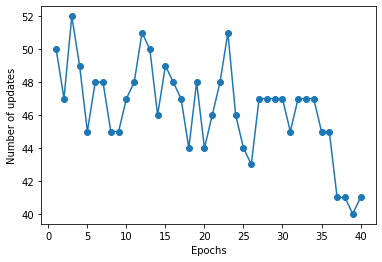

In [8]:
ppn = Perceptron(eta=0.0001, n_iter=40)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Hard Drive Space (GB)')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()

NameError: name 'Xint' is not defined